# Ford Gobike System Data Exploration
## by Mohamed Salama

## Preliminary Wrangling

> Ford GoBike is the Bay Area's bike share system, The data that we will conduct the analysis on is for the month of February 2019.

In [227]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Gathering and Assessing Data

In [228]:
df0=pd.read_csv('201902-fordgobike-tripdata.csv')
df0.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [229]:
# structure about the dataset
df0.shape

(183412, 16)

In [230]:
# information about the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> There are incorrect data types

In [231]:
# Random sampling
df0.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
54458,1130,2019-02-21 12:37:42.7410,2019-02-21 12:56:33.5350,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,350.0,8th St at Brannan St,37.771431,-122.405787,5353,Subscriber,1993.0,Male,No
24270,926,2019-02-25 18:22:36.9210,2019-02-25 18:38:03.5230,36.0,Folsom St at 3rd St,37.783830,-122.398870,115.0,Jackson Playground,37.765026,-122.398773,4949,Subscriber,1991.0,Female,No
116434,229,2019-02-12 07:52:41.1680,2019-02-12 07:56:30.9090,249.0,Russell St at College Ave,37.858473,-122.253253,243.0,Bancroft Way at College Ave,37.869360,-122.254337,5042,Subscriber,1961.0,Male,No
154547,394,2019-02-06 09:41:07.8010,2019-02-06 09:47:41.9990,178.0,Broadway at 30th St,37.819381,-122.261928,176.0,MacArthur BART Station,37.828410,-122.266315,1425,Subscriber,1965.0,Male,No
122003,710,2019-02-11 13:08:25.7090,2019-02-11 13:20:15.7970,192.0,37th St at West St,37.826696,-122.271797,153.0,59th St at Horton St,37.840945,-122.291360,4662,Subscriber,1997.0,Male,No


In [232]:
# Statistical description of the data
df0.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


There are some abnormal values in the date of birth, as it is the smallest value for the birth in 1878, which is illogical

Text(0.5, 1.0, 'Boxplot for Age')

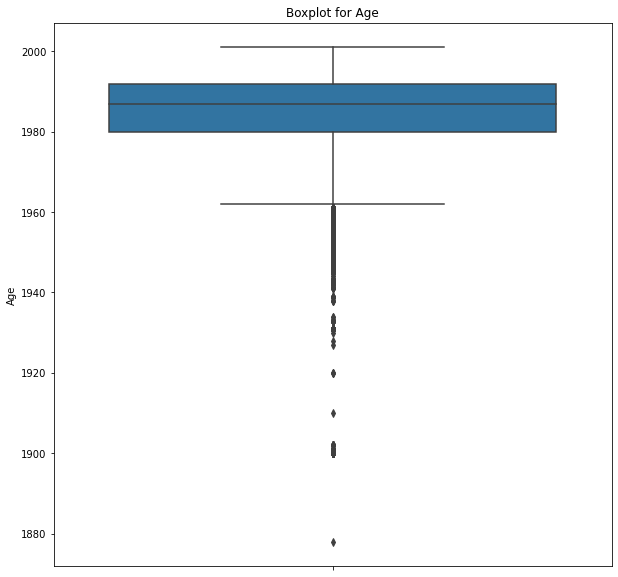

In [233]:
# Checking for outliers by boxplot
plt.figure(figsize = [10, 10])
sb.boxplot(data=df0, y='member_birth_year');
plt.ylabel('Age')
plt.title('Boxplot for Age')

Describe the abnormal values in the date of birth and the abnormal values in it

In [234]:
# check missing values
df0.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are many values missing

In [235]:
# Check duplicate values
df0.duplicated().sum()

0

### Data Cleaning 

In [236]:
# Create a new df
df1=df0.copy()
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [237]:
# Change the data type for start and end time and 
df1.start_time = pd.to_datetime(df1.start_time)
df1.end_time = pd.to_datetime(df1.end_time)

# Change the data type for bike id
df1.bike_id = df1.bike_id.astype(str)

In [238]:
# test Change the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [239]:
# drop some columns unnecessary
df1.drop(['start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [240]:
# Convert the duration in seconds to duration in minutes, hours, and days
df1.insert(1, 'duration_minutes', df1.duration_sec/60)
df1.insert(2, 'duration_hours', df1.duration_sec/3600)
df1.insert(3, 'duration_days', df1.duration_hours/24)


In [241]:
# start and end of the day from start and end time
df1.insert(4, 'start_day', df1['start_time'].dt.day_name())
df1.insert(6, 'end_day', df1['end_time'].dt.day_name())

# Create a column for the number of hours
df1['start_time_hour'] = df1['start_time'].dt.hour
df1['end_time_hour'] = df1['end_time'].dt.hour

# Create a column for weekday
df1['start_time_weekday']=df1['start_time'].dt.strftime('%a')

# Create an age column
df1['member_age'] = 2019 - df1['member_birth_year']

In [242]:
# sort weekday
start_day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
end_day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


df1['start_day_ordered'] = pd.Categorical(df1['start_day'], categories=start_day_ordered, ordered=True)
df1['end_day_ordered'] = pd.Categorical(df1['end_day'], categories=end_day_ordered, ordered=True)

In [243]:
# check adding columns
df1.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_id,start_station_name,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,end_time_hour,start_time_weekday,member_age,start_day_ordered,end_day_ordered
0,52185,869.750000,14.495833,0.603993,Thursday,2019-02-28 17:32:10.145,Friday,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),...,Customer,1984.0,Male,No,17,8,Thu,35.0,Thursday,Friday
1,42521,708.683333,11.811389,0.492141,Thursday,2019-02-28 18:53:21.789,Friday,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,...,Customer,NaN,NaN,No,18,6,Thu,NaN,Thursday,Friday
2,61854,1030.900000,17.181667,0.715903,Thursday,2019-02-28 12:13:13.218,Friday,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,...,Customer,1972.0,Male,No,12,5,Thu,47.0,Thursday,Friday
3,36490,608.166667,10.136111,0.422338,Thursday,2019-02-28 17:54:26.010,Friday,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,...,Subscriber,1989.0,Other,No,17,4,Thu,30.0,Thursday,Friday
4,1585,26.416667,0.440278,0.018345,Thursday,2019-02-28 23:54:18.549,Friday,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,...,Subscriber,1974.0,Male,Yes,23,0,Thu,45.0,Thursday,Friday


In [244]:
df1.shape

(183412, 22)

In [245]:
# Delete outliers from age
index = df1[(df1['member_age'] >= 90)|(df1['member_age'] <= 4)].index
df1.drop(index, inplace=True)
df1['member_age'].describe()

count    175070.000000
mean         34.157011
std           9.966723
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: member_age, dtype: float64

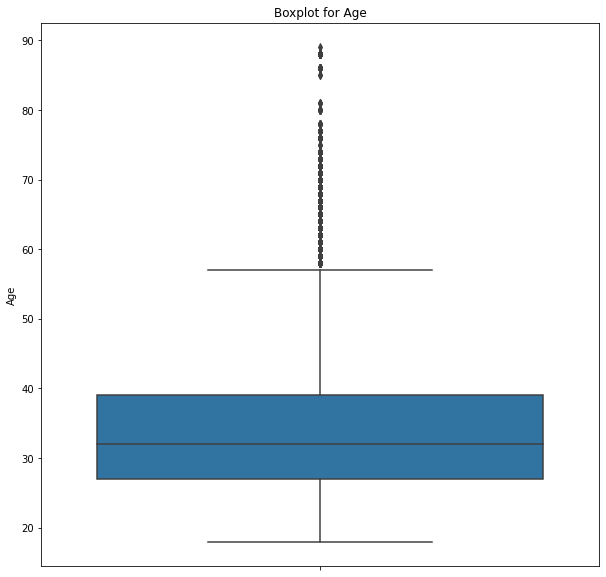

In [246]:
# Checking remove outliers by boxplot
plt.figure(figsize = [10, 10])
sb.boxplot(data=df1, y='member_age');
plt.ylabel('Age')
plt.title('Boxplot for Age');

> Removal of outliers over 90 years of age

In [247]:
# Fill in the missing values of age by mean age
mean=df1['member_age'].mean()
df1['member_age'].fillna(mean, inplace=True)

In [275]:
# Checking missing values
df1.isna().sum()

duration_sec                  0
duration_minutes              0
duration_hours                0
duration_days                 0
start_day                     0
start_time                    0
end_day                       0
end_time                      0
start_station_id            197
start_station_name          197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_time_hour               0
end_time_hour                 0
start_time_weekday            0
member_age                    0
start_day_ordered             0
end_day_ordered               0
dtype: int64

In [249]:
# Set color for visualizations
base_color = sb.color_palette('colorblind')[0]

### What is the structure of your dataset?

> Dataset FordGoBike for the month of February 2019, The data contains approximately 1,860,000 individual trip records with 16 variables collected, After adding important variables to the exploratory analysis, we have 20 variables

### What is/are the main feature(s) of interest in your dataset?

> The number of trips during weekday, the age group that has the most impact on the length of the trip and the most frequent use of this system, as well as whether the service is used by subscribers only or customers as well, and whichever achieves the longest and most use of this service

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration of the trip in seconds, especially after converting it in minutes, hours, and days, as well as the start time, date of birth, user type and gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [250]:
df1.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_id,start_station_name,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,end_time_hour,start_time_weekday,member_age,start_day_ordered,end_day_ordered
0,52185,869.750000,14.495833,0.603993,Thursday,2019-02-28 17:32:10.145,Friday,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),...,Customer,1984.0,Male,No,17,8,Thu,35.000000,Thursday,Friday
1,42521,708.683333,11.811389,0.492141,Thursday,2019-02-28 18:53:21.789,Friday,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,...,Customer,NaN,NaN,No,18,6,Thu,34.157011,Thursday,Friday
2,61854,1030.900000,17.181667,0.715903,Thursday,2019-02-28 12:13:13.218,Friday,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,...,Customer,1972.0,Male,No,12,5,Thu,47.000000,Thursday,Friday
3,36490,608.166667,10.136111,0.422338,Thursday,2019-02-28 17:54:26.010,Friday,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,...,Subscriber,1989.0,Other,No,17,4,Thu,30.000000,Thursday,Friday
4,1585,26.416667,0.440278,0.018345,Thursday,2019-02-28 23:54:18.549,Friday,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,...,Subscriber,1974.0,Male,Yes,23,0,Thu,45.000000,Thursday,Friday


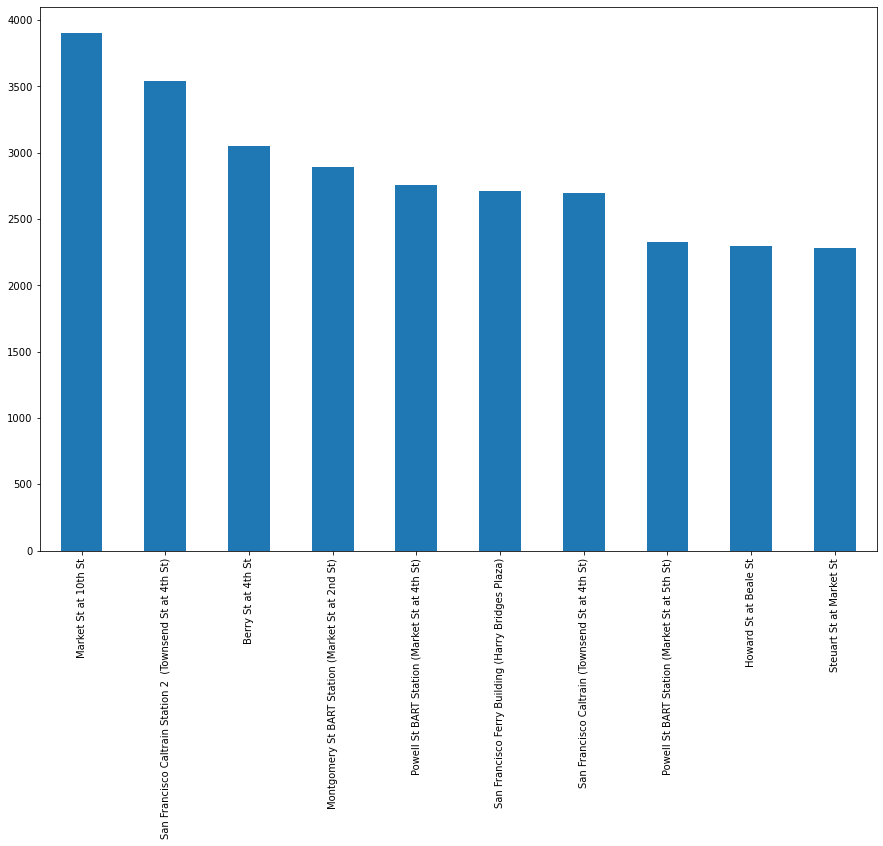

In [251]:
# the most 10 start station
plt.figure(figsize = [15, 10])
df1.start_station_name.value_counts(sort=True, ascending=False)[:10].plot(kind='bar');

> This graph shows the top 10 stations from which flights depart, and the most station is Market St at 10th st

In [252]:
# Create a function to calculate the number of trips, days and hours
def Distribution1(df1, d1, t1, normalize=True):
    graph = sb.catplot(data=df1, x=d1, kind='count', color = base_color , aspect = 2)
    graph.set_axis_labels(t1, 'Number of Bike Trips')
    graph.fig.suptitle(f'{t1} Trip by Ford GoBike System', y=1.05, fontsize=16, fontweight='bold');
    graph.set_xticklabels(rotation=75);

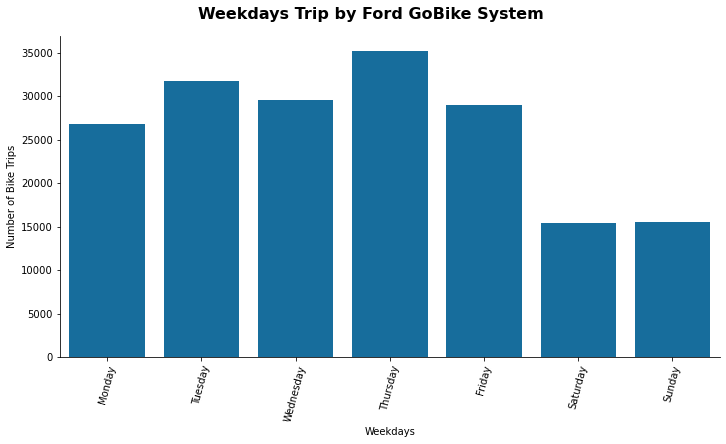

In [253]:
# function call
Distribution1(df1, 'start_day_ordered', 'Weekdays')

> The highest number of trips is on Thursday, when the number of trips reached more than 35,000 trips by Ford GoBike System.

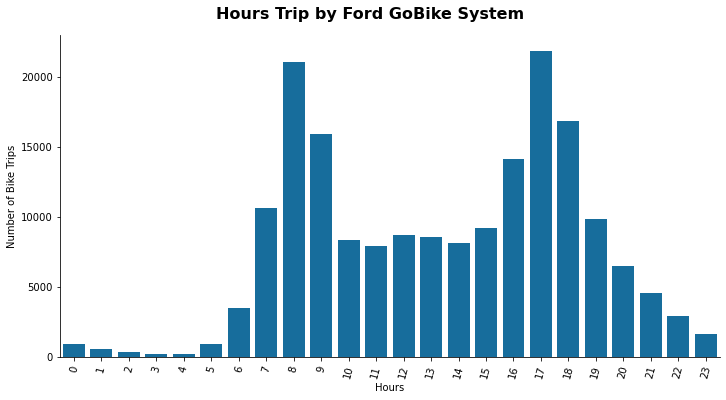

In [254]:
# function call
Distribution1(df1, 'start_time_hour', 'Hours')

> This visualization shows that the bike was used more during the early morning hours 8-9 am and in the afternoon during the hours 5 - 6 pm

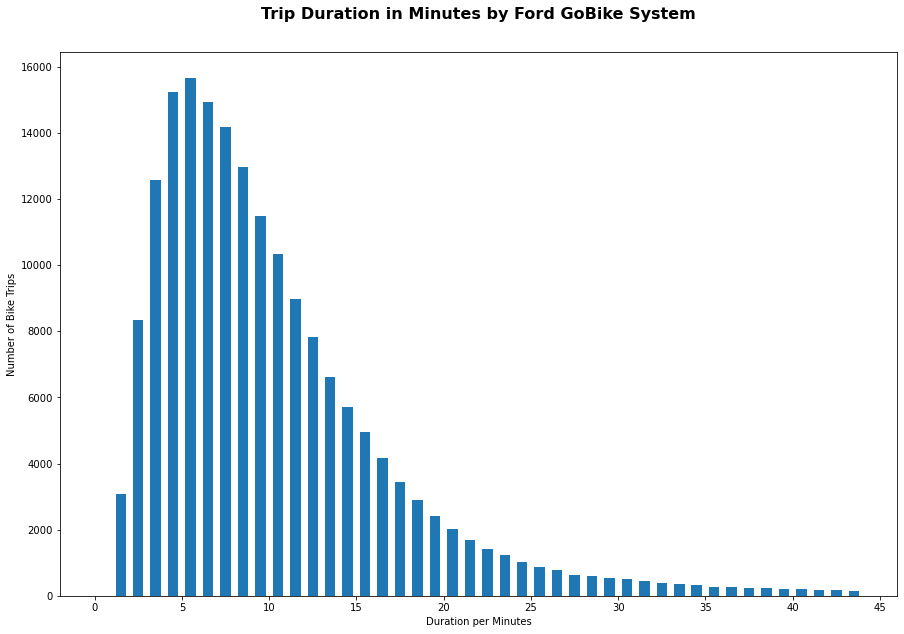

In [255]:
# The trip per minute by the bike
plt.figure(figsize = [15, 10])
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df1, x = 'duration_minutes', bins = bin_edges, rwidth = 0.6);
plt.title("Trip Duration in Minutes by Ford GoBike System", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration per Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

> The duration of the trip is between 4 to 15 minutes, so we conclude that the riders ride the bike in short distances.

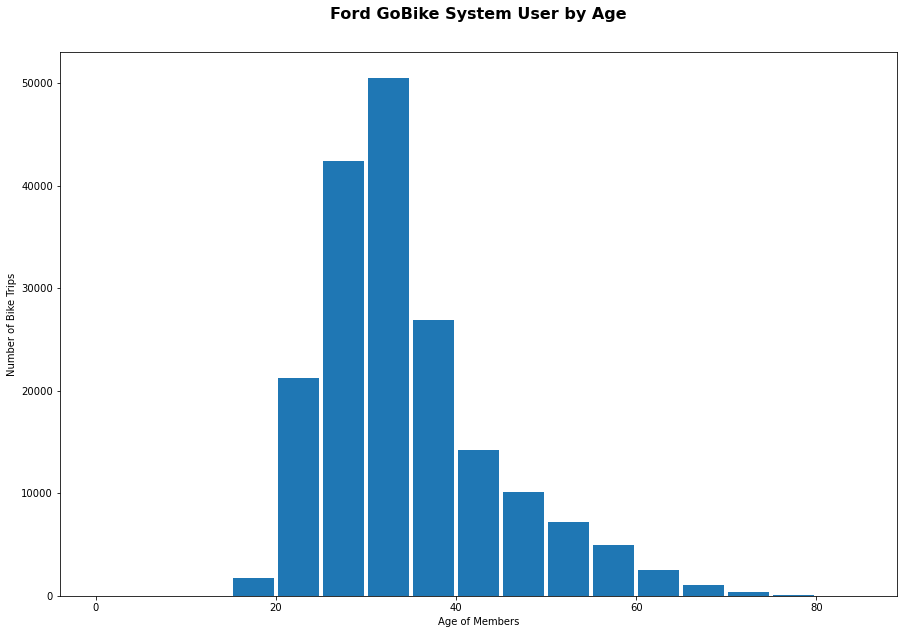

In [256]:
#The relationship between age and number of trips
plt.figure(figsize = [15, 10])
edges = np.arange(0, 90, 5)
plt.hist(data = df1, x = 'member_age', bins = edges, rwidth = 0.9);
plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold',)
plt.xlabel('Age of Members')
plt.ylabel('Number of Bike Trips');

> The highest number of trips was for young people from the age of 20 to 40, And the highest at the age of 30 to 35

In [257]:
# Create a function to find the number of a variable
def Distribution2(df1, d2, t2, normalize=True):
    plt.figure(figsize = [15, 10])
    sb.countplot(data=df1, x=d2, color=base_color);
    plt.title(f'Distribution of {t2}', y=1.05, fontsize=16, fontweight='bold',)
    plt.xlabel(f'{t2}')
    plt.ylabel('Count');

In [258]:
# The number of users of each type
df1.user_type.value_counts()

Subscriber    163473
Customer       19862
Name: user_type, dtype: int64

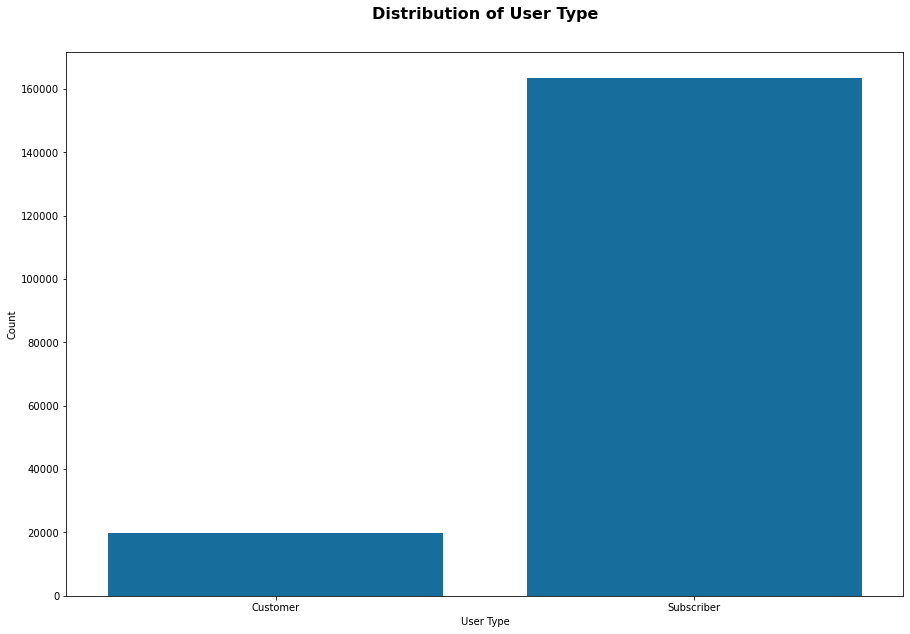

In [263]:
# function call
Distribution2(df1, 'user_type', 'User Type')

>The graph shows that the number of subscriber users exceeds 160000, while the number of customers is only 20000

In [264]:
# Number of users of each gender
df1.member_gender.value_counts()

Male      130590
Female     40830
Other       3650
Name: member_gender, dtype: int64

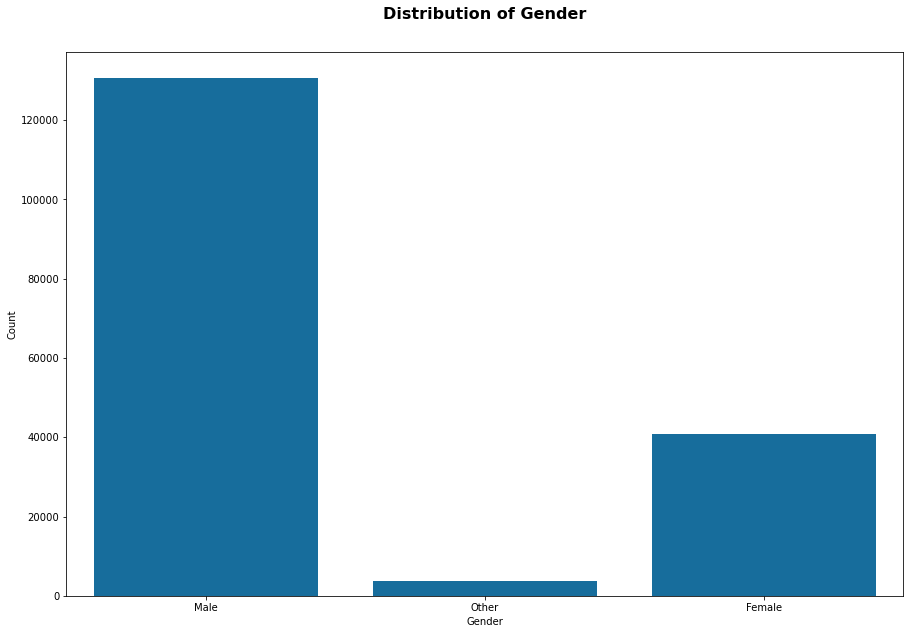

In [266]:
# function call
Distribution2(df1, 'member_gender', 'Gender')

> The number of male users exceeds the number of female users by a very large percentage, as the number of male users has reached more than 130,000, while the number of female users is approximately 40,000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are some interesting points about this system, as the customers were the ones who recorded the longest period of the trip, unlike the subscribers, most of whom had short but regular trips during weekdays, and this indicates that the subscribers use this service as a means of transportation to their work, while the customers are considered a means of entertainment

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I have made some modifications to the data types to fit the required analysis. Also, there were some problems in the date of birth, as it had many outliers values and missing values, so I removed these outliers values from the data so as not to affect the analysis, and I also compensated for the missing values through age averages After converting the date of birth to age

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

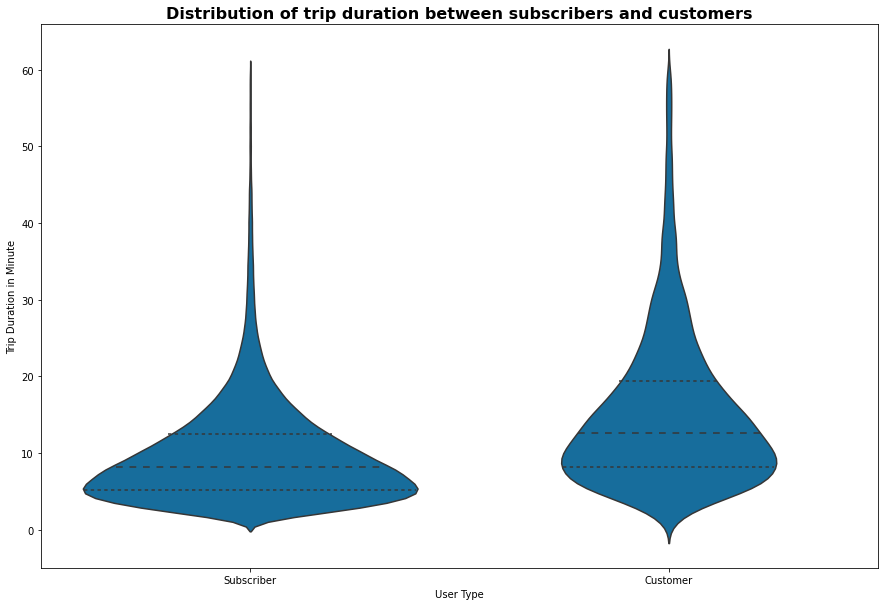

In [267]:
# Create a violin plot to compare the relationship between subscribers and customers through the duration of the trip
plt.figure(figsize = [15, 10])
sb.violinplot(data=df1.query('duration_minutes <= 60'), x='user_type', y='duration_minutes', color=base_color, inner='quartile');
plt.title('Distribution of trip duration between subscribers and customers', fontsize=16, fontweight='bold')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

> Through violinplot we find that the trip duration for subscribers is much shorter than that of customer and we conclude that subscribers have more limited use for short distances while customers rent bikes for a longer period

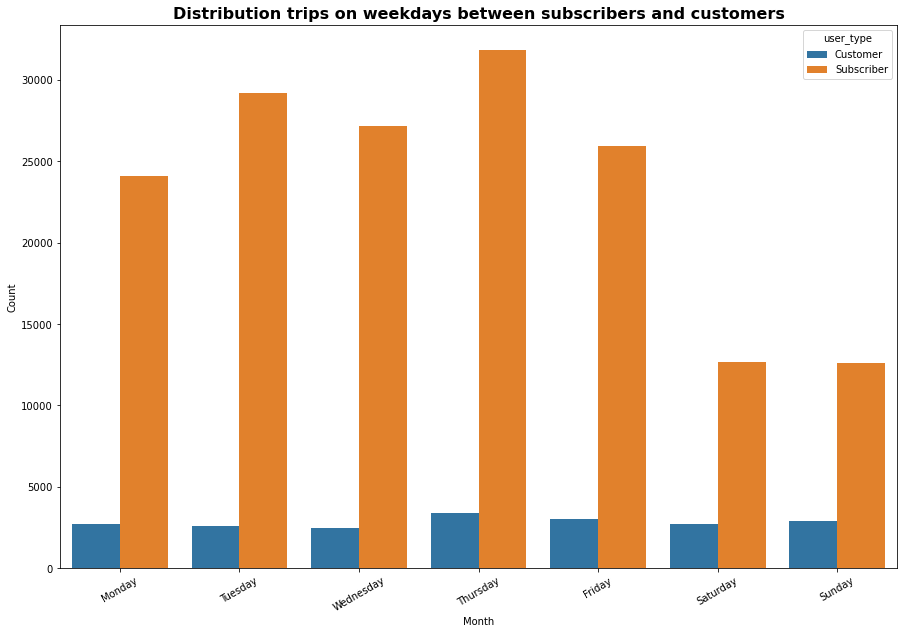

In [268]:
# Distribution trips on weekdays between subscribers and customers
plt.figure(figsize = [15, 10])
sb.countplot(data=df1, x='start_day_ordered', hue='user_type');
plt.title('Distribution trips on weekdays between subscribers and customers', fontsize=16, fontweight='bold')
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

> Through the graph, we find that the subscribers’ use of the bicycle is much more than the customers, and here we find that the subscribers’ use of the bicycle on normal days indicates that they use it to go to work as a means of transportation, while the clients use the bicycle indicates that they use it as a means of entertainment

In [269]:
# Create a function to find the relationship between two variables
def Distribution3(df1, d3, t3, normalize=True):
    plt.subplots(figsize=(15,10))
    sb.pointplot(data=df1, x=d3 , y='duration_minutes')
    plt.title(f'Duration of  Bike Trips Each Weekday - {t3}', fontsize = 16, weight = "bold")
    plt.ylabel('Duration Minutes', fontsize = 14, weight = "bold")
    plt.xlabel('Days', fontsize=14, weight = "bold"); 

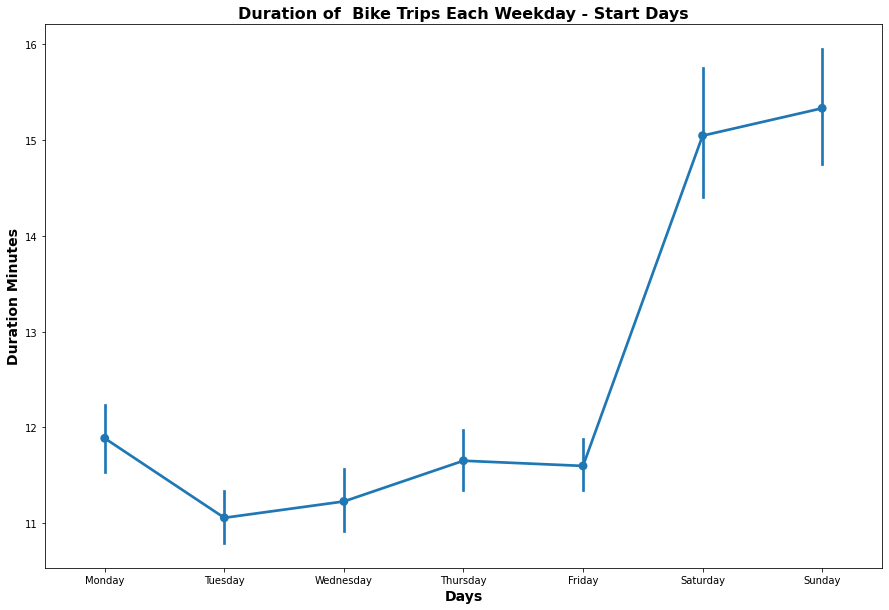

In [270]:
Distribution3(df1, 'start_day_ordered', 'Start Days')

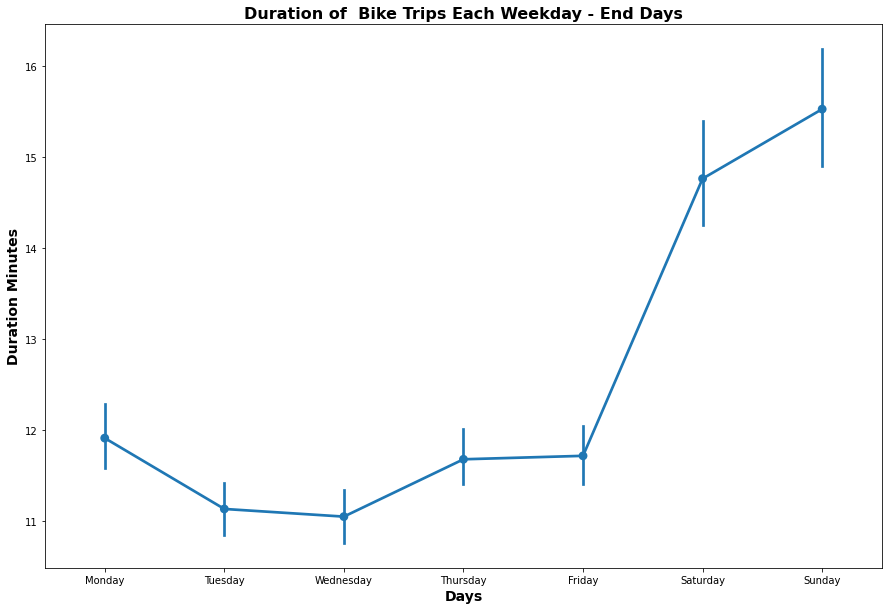

In [271]:
Distribution3(df1, 'end_day_ordered', 'End Days')

> we find that Sundays and saturday are the most long days for a bike trip.
We find some differences at the start day from end day, so we find that the curve on Tuesday and Wednesday at the start day has increased in the number of trips from the end day, but it is a simple increase.

In [272]:
# Create a function to find the relationship between two variables
def Distribution4(df1, d4, b4, t4, normalize=True):
    plt.subplots(figsize=(15,10))
    ax = sb.histplot(data=df1, x=d4, hue=b4, kde=True,)
    plt.title(f'Most Common {t4} For Having Bike Trips', fontsize = 16, weight = "bold")
    plt.ylabel('Bike Trips')
    plt.xlabel(t4); 

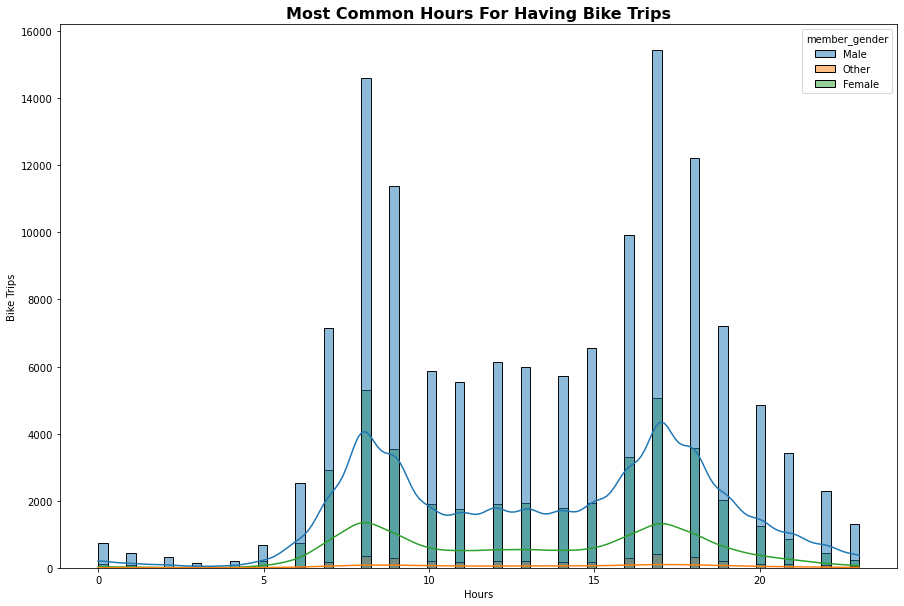

In [273]:
Distribution4(df1, 'start_time_hour', 'member_gender', 'Hours')

> Through this multiple perception, we find that, as we previously knew, men use bicycles more than women, and also the length of the hourly trip was 8 to 10 and 16 to 18 hours

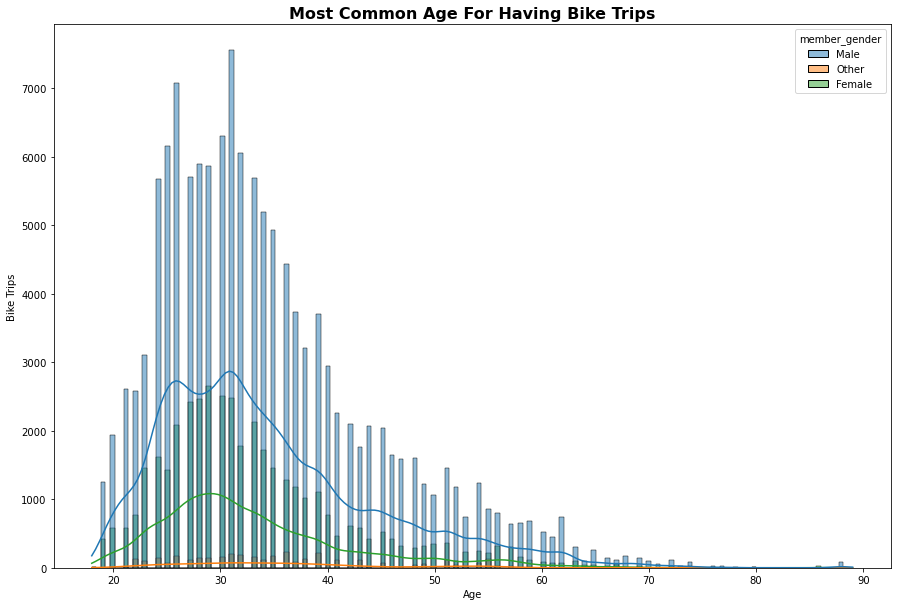

In [274]:
Distribution4(df1, 'member_age', 'member_gender', 'Age')

> Through this multiple perception, we find that, as we previously knew, age has an impact on the duration of the trip, as well as gender

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are interesting differences between the behavior patterns of customers and subscribers. As noted above in the bivariate exploration analysis, customers are more causal passengers who use the service often between 10am and 7pm and increase slowly from midweek and take more rides during weekends. Subscribers who actually use the service from Monday to Friday between 8am-9am and 5pm-6pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in flight duration between customers and subscribers. Customer trips are usually longer than those of subscribers, likely due to the fact that they prefer cycling on weekends in the summer, which encourages longer trips around the area. On the other hand, subscribers mainly use the system for commuting purposes, so they prefer quick commuting to and from work/school.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

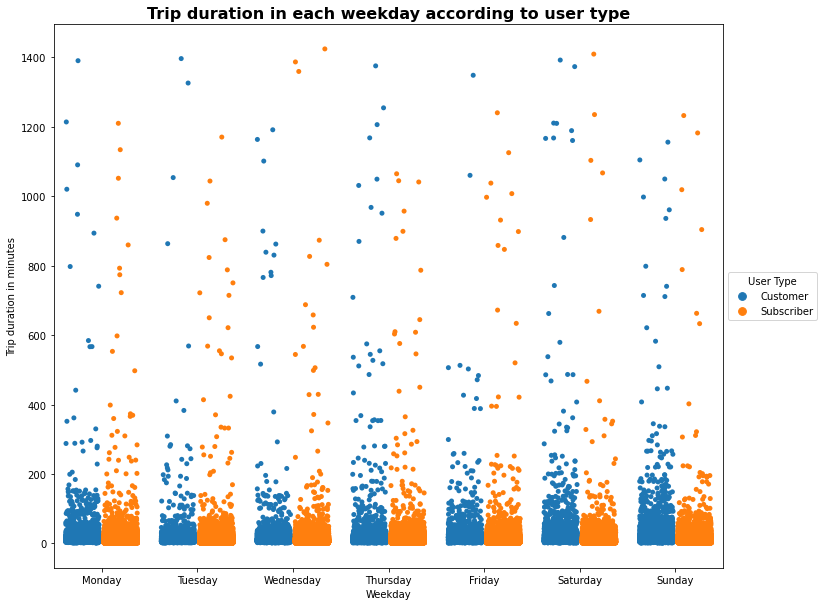

In [192]:
plt.figure(figsize = [12, 10])
sb.stripplot(data= df1, x= 'start_day_ordered', y= 'duration_minutes', hue= 'user_type', jitter= 0.35, dodge= True);
plt.legend(loc= 'center left', bbox_to_anchor= (1,0.5), title= 'User Type')
plt.title('Trip duration in each weekday according to user type', fontsize = 16, weight = "bold")
plt.xlabel('Weekday')
plt.ylabel('Trip duration in minutes');

> In the short period of time there is almost no difference between subscribers and customers, while in the large period of time there is a difference between them as the customers are more than the subscribers

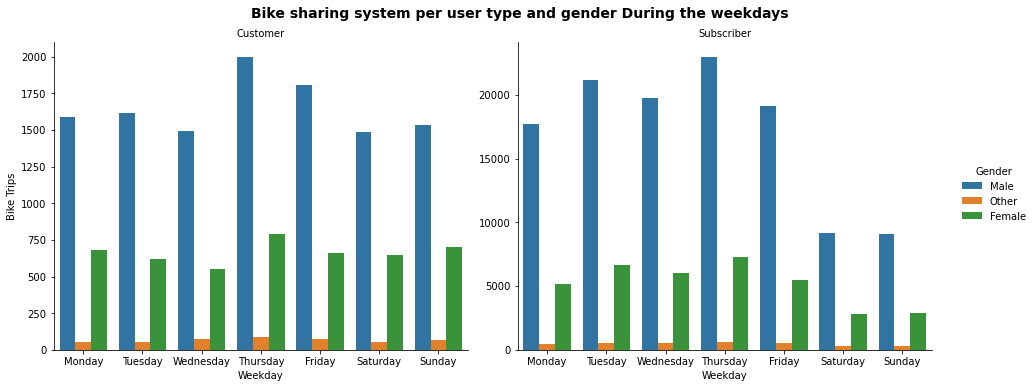

In [193]:
# bike sharing system per user type and gender During the weekdays
g = sb.catplot(data=df1, x='start_day_ordered', col="user_type", hue='member_gender', kind='count', sharey = False, aspect=1.3)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Bike sharing system per user type and gender During the weekdays', y=1.03, fontsize=14, fontweight='semibold');


> For subscribers, they use the system during weekdays regularly at certain times, which indicates, as I mentioned earlier, that they use it as a means of transportation, while customers use it on holidays

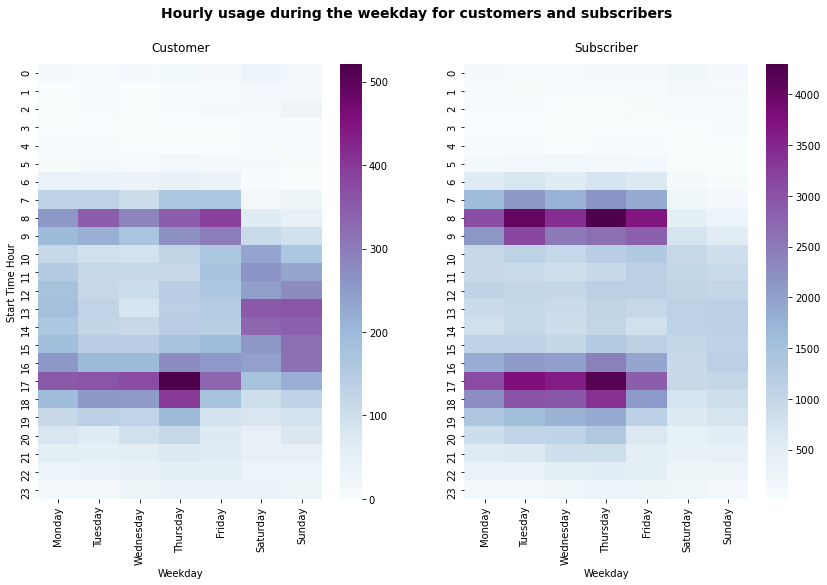

In [194]:
# create heatmap for customers and heatmap for subscribers 
df1['start_day_ordered'] = pd.Categorical(df1['start_day_ordered'], ordered=True)
plt.figure(figsize=(14,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')
#customers
plt.subplot(1, 2, 1)
df_customer = df1.query('user_type == "Customer"').groupby(["start_time_hour", "start_day_ordered"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_day_ordered", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")
plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
#subscribers
plt.subplot(1, 2, 2)
df_subscriber = df1.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_day_ordered"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_day_ordered", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")
plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday');
plt.ylabel('');


> Subscribers: They bike regularly throughout the week and most bike rides start around 8-9 am. and 5-6 p.m. and culminate on Thursdays around 8 am and 5 pm

> customers: They bike on weekdays and most bike rides start around 8-9 a.m. and 5-6 am and peak on Thursdays around 5 pm

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through this part of the important analysis, I found that it describes the behavior of users, whether subscribers or customers, during the days of the week in terms of flight times and the duration that each of them cuts and the most used days for this service, and thus led to the conclusion of the user’s behavior and how to use this service, The gender was also described and which one uses the bike the most

### Were there any interesting or surprising interactions between features?

> The third heatmap shows interesting differentiations among the user segments as it appears that women have longer trips than men and also the elderly, although men and young people are the largest percentage of using this service

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!